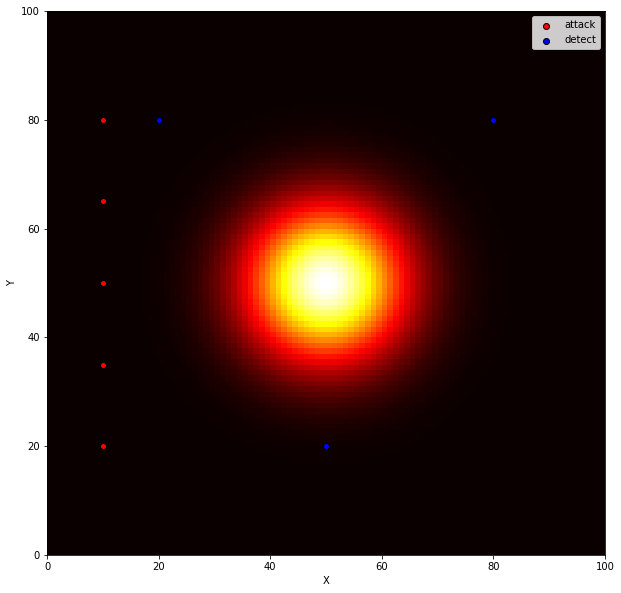

<AxesSubplot:xlabel='X', ylabel='Y'>

In [1]:
import sys
import os
# Make sure the src and configs folders are importable
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))
%matplotlib inline
import numpy as np
from targets import Gaussian
from env import Environment
from attackers import Attacker
from detectors import Detector
import detector_configs

# Create a simple 2D Gaussian centered in the middle of a 100x100 grid
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 100.0  # spread out
target = Gaussian(mean, cov)
env = Environment(width, height, target)

# Create some attacker drones (red)
# Position them along the left edge
for i in range(5):
    attacker = Attacker(
        start_position=(10.0, 20.0 + i * 15.0),
        target_position=(90.0, 50.0),
        steps=10
    )
    # For visualization, we'll use the first position in trajectory
    attacker.position = attacker.trajectory[0]
    env.add_atk_drone(attacker)

# Create some detector units (blue)
# Using the actual enum values: RADAR, VISUAL, ACOUSTIC
detector_configs_list = [
    (detector_configs.DetectorType.RADAR, (20.0, 80.0)),
    (detector_configs.DetectorType.VISUAL, (80.0, 80.0)),
    (detector_configs.DetectorType.ACOUSTIC, (50.0, 20.0))
]
for det_type, pos in detector_configs_list:
    detector = Detector(type=det_type, position=pos)
    env.add_detector(detector)

# Visualize the environment
env.visualize(figsize=(10, 10))